# Import libraries

In [1]:
import time

import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import RidgeClassifierCV

from rocket.rocket_functions import generate_kernels 
from rocket.rocket_functions import apply_kernels

sns.set()

# Load mnist

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

print('X_train.shape:', X_train.shape)
print('y_train.shape:', y_train.shape)
print('X_test.shape:', X_test.shape)
print('y_test.shape:', y_test.shape)

X_train.shape: (60000, 28, 28)
y_train.shape: (60000,)
X_test.shape: (10000, 28, 28)
y_test.shape: (10000,)


In [3]:
def normalize(X):
    X = X / 255.0
    return (X - X.mean()) / X.std()

In [4]:
# Flatten the images
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

# Normalize the data
X_train = normalize(X_train)
X_test = normalize(X_test)

print('X_train.shape:', X_train.shape)
print('X_test.shape:', X_test.shape)

X_train.shape: (60000, 784)
X_test.shape: (10000, 784)


# Visualizing mnist as time series

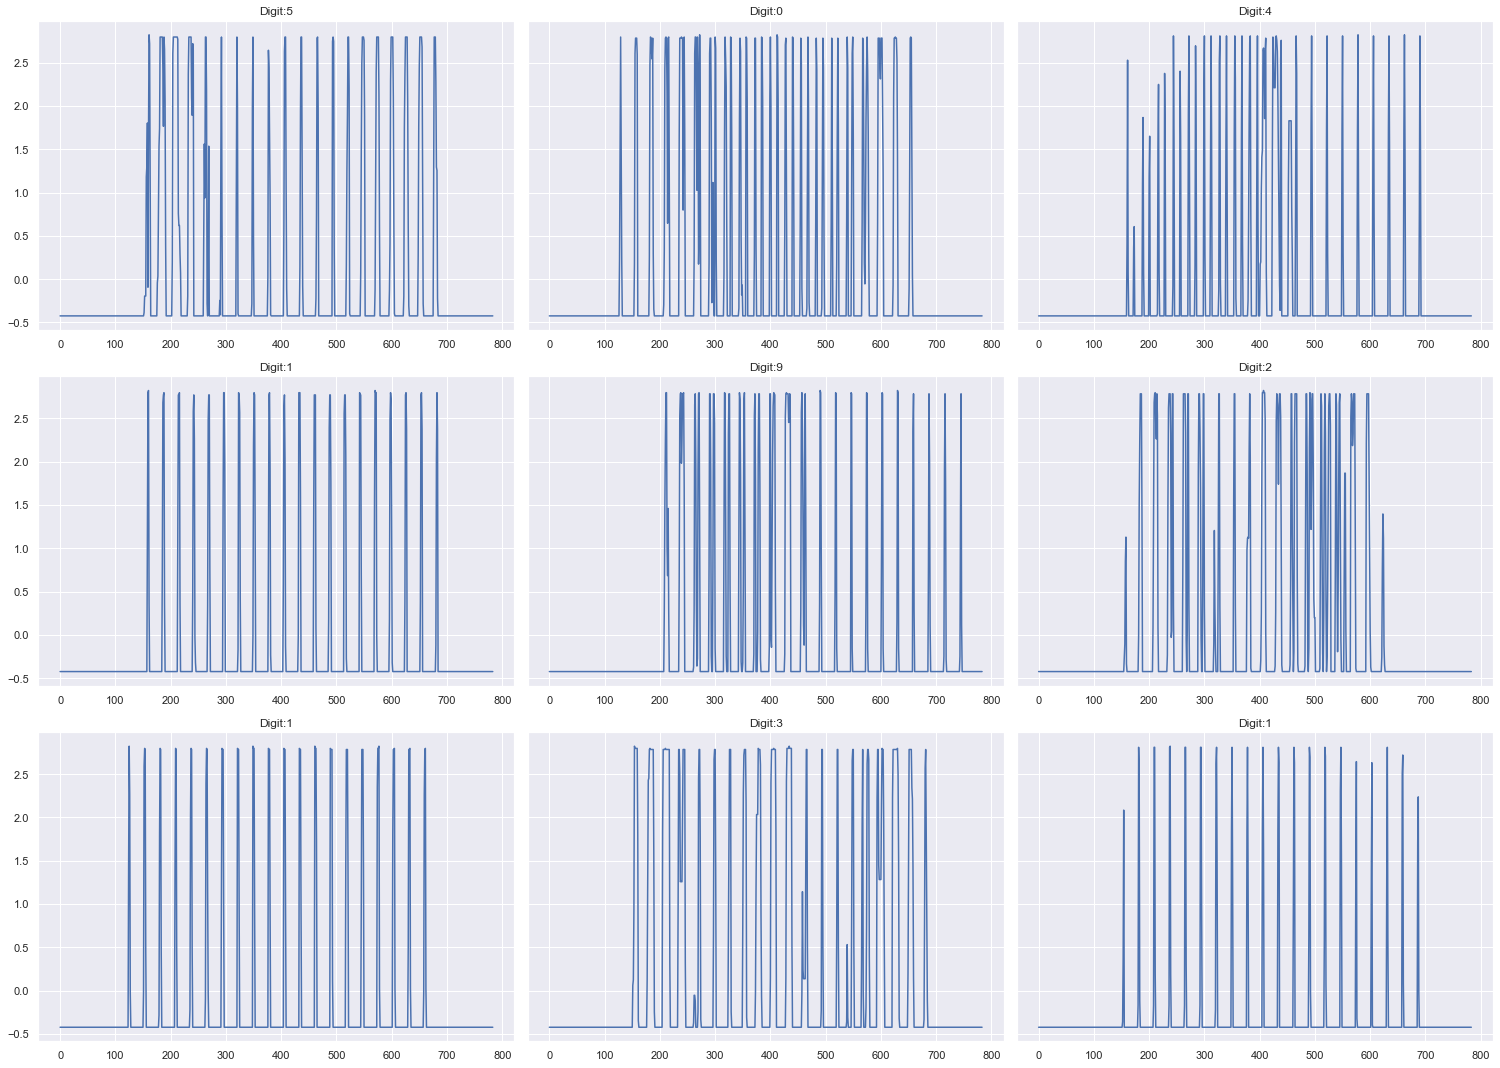

In [5]:
ncols = 3
nrows = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, tight_layout=True, sharey=True, figsize=(7*ncols, 5*nrows))
for pos in range(9):
    i = pos // ncols
    j = pos - (i * ncols)
    ax = axes[i, j]
    ts = X_train[pos]
    label = y_train[pos]
    ax.set_title(f'Digit:{label}')
    ax.plot(ts)

# Predict mnist with ROCKET

In [6]:
rf_clf = RidgeClassifierCV()

start_fit = time.time()

kernels = generate_kernels(X_train.shape[-1], 400)

X_train_transformed = apply_kernels(X_train, kernels)

rf_clf.fit(X_train_transformed, y_train)

end_fit = time.time()

X_test_transformed = apply_kernels(X_test, kernels)

score = rf_clf.score(X_test_transformed, y_test)

end_test = time.time()

print('Fit time:', end_fit - start_fit, 'seconds')
print('Test time:', end_test - end_fit, 'seconds')
print('Accuracy:', score)

Fit time: 33.23133397102356 seconds
Test time: 4.534208536148071 seconds
Accuracy: 0.9644
